# • DOMAIN: Telecom
- • CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
- • PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [6]:
import pandas as pd
import numpy as np

# • STEPS AND TASK :
# 1 . Data Understanding & Exploration: 
- A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. 
- B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.



In [7]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
print(df1)
print('*'*80)
print(df2)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  
0              No  No phone service             DSL             No  
1             Yes    

- C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

In [8]:
data = pd.merge(df1,df2, on='customerID')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. 

In [10]:
df1_col=len(df1.axes[1]) # Axes of 1 is for a column
df2_col = len(df2.axes[1])
print("df1-columns "+" "+ "df2 columns",df1_col,df2_col)
df_cols = len(data.axes[1])
print("")
if(df_cols == (df1_col + df2_col - 1)): # -1 since the dataframes are merged using the column customerID (repeated)
    print("All the columns are incorporated ",df_cols)
else:
    print("Columns missing")

df1-columns  df2 columns 10 12

All the columns are incorporated  21


# 2. Data Cleaning & Analysis: 
- A. Impute missing/unexpected values in the DataFrame. 



- As a initial test to find the missing values the test depicts as their are no null values present. But further analysis demonstrate the impurities in the TotalCharges column that has been removed subsequently>

In [11]:
data.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
count = data['TotalCharges'].value_counts()
count

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
2434.45     1
5791.1      1
4504.9      1
923.5       1
4594.65     1
Name: TotalCharges, Length: 6531, dtype: int64

- B. Make sure all the variables with continuous values are of ‘Float’ type. [For Example: MonthlyCharges, TotalCharges]

In [14]:
print(data['TotalCharges'].value_counts()[' '])

11


In [15]:
data.loc[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
data1 = data.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754], axis=0)

In [17]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
data1["TotalCharges"] = pd.to_numeric(data1["TotalCharges"], downcast="float")

In [19]:
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

- C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. 
- D. Share insights for Q2.c. 

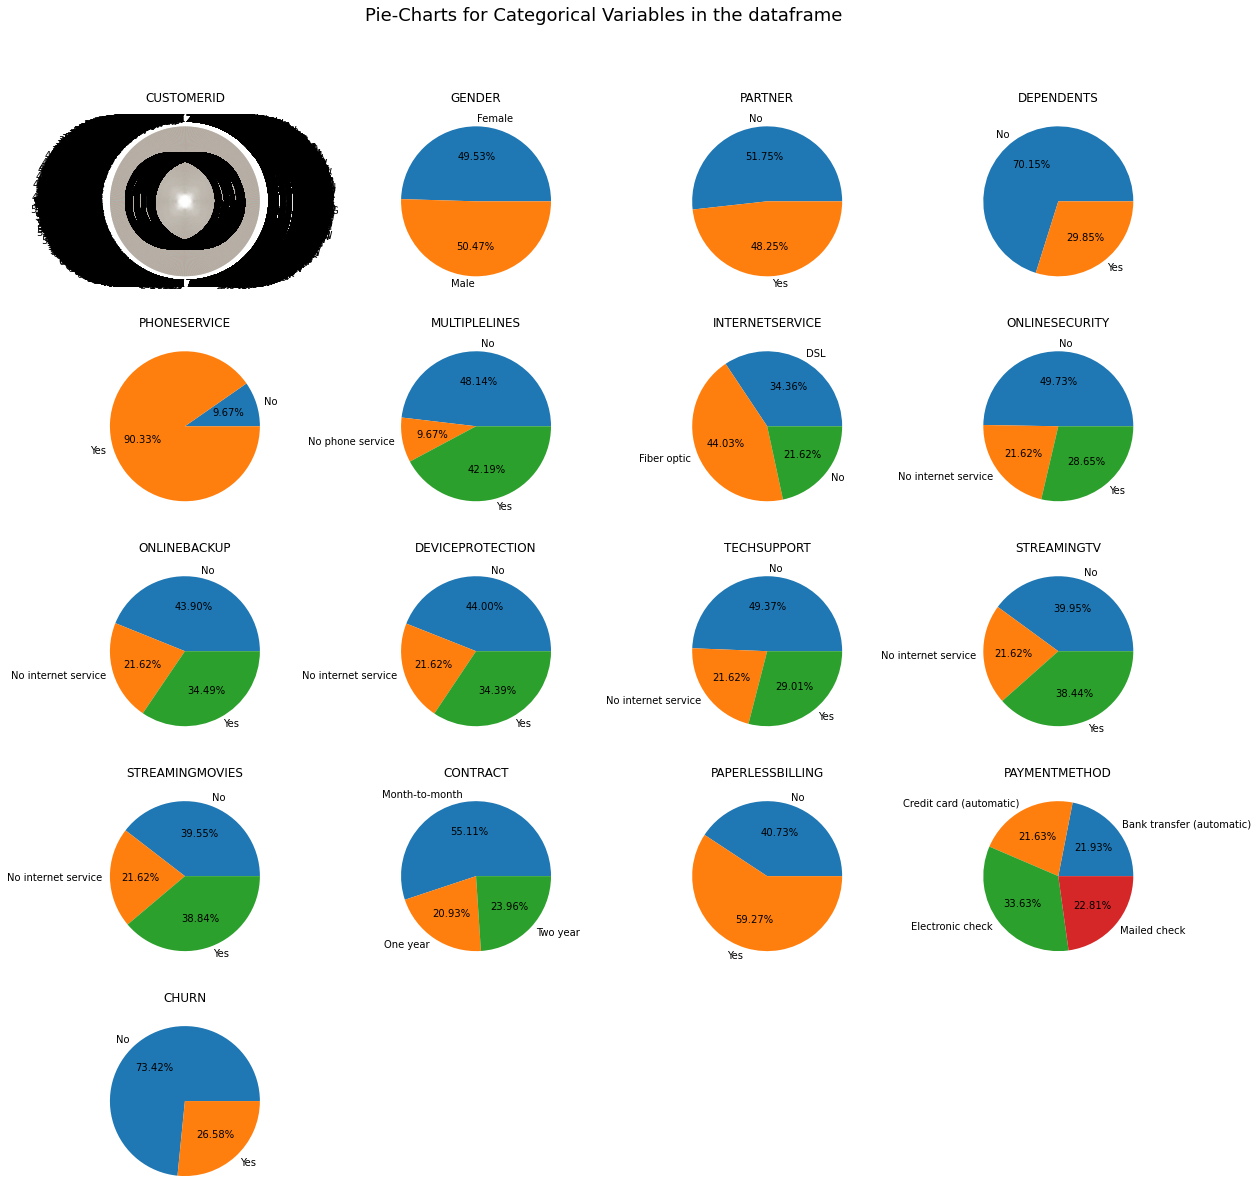

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(data_pie,m):
    
    
    #get all the column names in the dataframe
    a = []
    for i in data_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (data1[i].dtype.name) == 'object':
            b.append(i)
        
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        data1.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()
    
pie_charts_for_CategoricalVar(data1,4)

- The above function plots pie chart for various categorical data and please do neglect the customerID which is a type of categorical data which is also used to plot and probably won't yield any result. The remaing have significant importance over the dataset with each category having the classification groups with certain percentage of value that constitutes the pie chart.

In [21]:
# Categorical boolean mask
categorical_feature_encoding = data1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data1.columns[categorical_feature_encoding].tolist()
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

- E. Encode all the appropriate Categorical features with the best suitable approach. 

- Have  utlizied labelencoder method to encode the categorical variable data to numeric to train. Their are other methods as well namely onehot encoding, vectorization, tf_idf methods to name 

In [22]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [23]:
# apply le on categorical feature columns
data1[categorical_cols] = data1[categorical_cols].apply(lambda col: le.fit_transform(col))
data1[categorical_cols].head(10)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,6540,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
6,1001,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0
7,4760,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0
8,5593,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,1
9,4524,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  


In [25]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.850000,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.500000,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.150002,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.750000,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.649994,1



- F. Split the data into 80% train and 20% test. 
- G. Normalize/Standardize the data with the best suitable approach. 

- Data is split into a ratio of 80:20 and the data is standardized using standardscaler technique. They are many other scaling and normalizing techniques namely minmax scaler, z-score, log scaling to name

In [26]:
X =data1.drop("Churn",axis=1)
y = data1.Churn

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) # data split 80:20
X_train.shape,X_test.shape

((5625, 20), (1407, 20))

In [91]:
from sklearn.preprocessing import StandardScaler
data_scale= StandardScaler()  #Standardizing the data
scale_res= data_scale.fit_transform(X) 
print(scale_res)


[[ 0.91110011 -1.00943013 -0.44032709 ...  0.39980518 -1.16169394
  -0.99419409]
 [ 0.21552111  0.99065797 -0.44032709 ...  1.33663626 -0.26087792
  -0.17373982]
 [-0.47168335  0.99065797 -0.44032709 ...  1.33663626 -0.36392329
  -0.95964911]
 ...
 [-0.0775876  -1.00943013 -0.44032709 ...  0.39980518 -1.17000405
  -0.85451413]
 [ 1.1859819   0.99065797  2.27103902 ...  1.33663626  0.31916782
  -0.87209545]
 [-0.63769619  0.99065797 -0.44032709 ... -1.47385696  1.35793167
   2.01234407]]


# 3. Model building and Improvement: 
- A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. 



In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
xgb= XGBClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
#print(f'accuracy of model is(train score):{accuracy_score(y_train,y_pred)}')
print(f'accuracy of model is(test score):{accuracy_score(y_test,y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

[13:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of model is(test score):0.7931769722814499
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1046
           1       0.61      0.55      0.58       361

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[917 129]
 [162 199]]


- Hyperparameters that are responsible for the train and test performance of xgbost

In [37]:
xgb.fit(X_train, y_train)

[17:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. 

In [47]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.8382007810741708
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 1, 'learning_rate': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5}


- The parameters responsible for the improvement in the model performance is mentioned that provides the best accuracy of the trained model.

# • DOMAIN: IT
# • CONTEXT: 
- The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save effortsinvolved in building workflows for each dataset.
- • PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.
# STEPS AND TASK :
- 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
- 2. Create separate functions for various purposes.
- 3. Various base models should be trained to select the best performing model.
- 4. Pickle file should be saved for the best performing model.
    - Include best coding practices in the code:
        - • Modularization
        - • Maintainability
        - • Well commented code etc.

In [47]:
def missing_values(dframe):
    def d_info(dframe):
            print(dframe.describe()) # this sub function prints the basic info about the dataset
            print(dframe.info())
    d_info(dframe)
    #dframe = dframe[dframe['TotalCharges'] != ' ']
    print("percentage of missing data of dataframe \n",dframe.isnull().sum()/len(dframe)*100)
    print(" ")# to find null values
    #return dframe


In [48]:
def eda_analysis(dframe): # simple eda analysis to know about the data
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.pairplot(dframe, hue ='Churn')
    plt.show()

In [49]:
def model_build(new_data):
    
    missing_values(dframe) # call function to check basic info about the dataframe
    
    eda_analysis(dframe) # simple eda analysis of the dataframe
    
    X =new_data.drop("Churn",axis=1)  # split data into target variable y and the features x
    y = new_data.Churn
    
    def preprocessing_(X):
          # Categorical boolean mask
        c_feature = X.dtypes==object
        # filter categorical columns using mask and turn it into a list
        c_cols = X.columns[c_feature].tolist()
    
        le1 = LabelEncoder() # encode the features to train the model
        X[c_cols] = X[c_cols].apply(lambda col: le1.fit_transform(col))
    
        data_scale= StandardScaler()  # standardization of the data
        scale_res= data_scale.fit_transform(X) 
        #print(scale_res)
        return scale_res
    data_scale = preprocessing_(X)
        
    
    
    def train_algo(x,y):
        acc = [] # list created to store the model scores
        
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)
        #X_train.shape,X_test.shape
        model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1) #decision tree classifier
        model1.fit(X_train,y_train)
        y_pred = model1.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        d_acc = accuracy_score(y_test,y_pred)
        acc.append(d_acc)  # pass the accuracy value to the list 
    
        
        bclass = BaggingClassifier() # bagging classifier 
        bclass.fit(X_train,y_train)
        y_predb = bclass.predict(X_test)
        #print(accuracy_score(y_test, y_predb))
        b_acc = accuracy_score(y_test,y_predb)
        acc.append(b_acc)
        
        adclass = AdaBoostClassifier(n_estimators=10, random_state=1) # Adaptive boosting classifier
        adclass.fit(X_train,y_train)
        y_preda = adclass.predict(X_test)
        #print(accuracy_score(y_test, y_preda))
        a_acc = accuracy_score(y_test,y_preda)
        acc.append(a_acc)
        
        gbclass = GradientBoostingClassifier(n_estimators = 50,random_state=1) # Gradient boosting classifier
        gbclass.fit(X_train,y_train)
        y_predg = gbclass.predict(X_test)
        #print(accuracy_score(y_test, y_predg))
        g_acc = accuracy_score(y_test,y_predg)
        acc.append(g_acc)
        
        rfclass = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12) # Random forest classifier
        rfclass.fit(X_train,y_train)
        y_predr = rfclass.predict(X_test)
        #print(accuracy_score(y_test, y_predr))
        r_acc = accuracy_score(y_test,y_predr)
        acc.append(r_acc)
        print(acc)
        
        max_acc = max(acc) # max accuracy of the model
        print("max_accuracy of the model -> ",max_acc)
        
        # if-else is utilized to identify the model with max accuracy and duely create the pickle file of the model
        if max_acc == d_acc:
            joblib.dump(model1, 'decision.pkl')
            print('Decision tree classifer')
        elif max_acc == b_acc:
            joblib.dump(bclass,'bagging.pkl')
            print('bagging classifier')
        elif max_acc == a_acc:
            joblib.dump(gbclass,'adaboost.pkl')
            print('adaptive boosting classifeir')
        elif max_acc == g_acc:
            joblib.dump(adclass,'gradientboost.pkl')
            print('gradient boosting classifer')
        elif max_acc == r_acc:
            joblib.dump(rfclass,'randomforest.pkl')
            print('random forest classifier')
        else:
            print('match not found')
        
    train_algo(data_scale,y)
         


In [54]:
def main():
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import LabelEncoder
    import joblib

    d1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
    d2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
    dframe = pd.merge(d1,d2, on='customerID')
    #dframe
    model_build(dframe)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

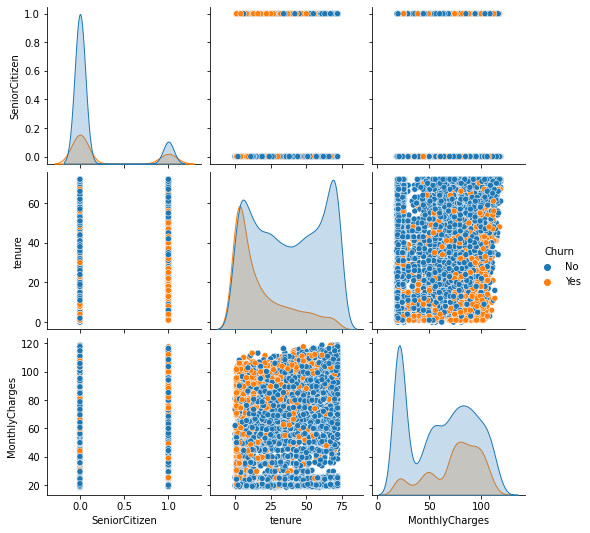

[0.7366926898509581, 0.7970191625266146, 0.7835344215755855, 0.8097941802696949, 0.8019872249822569]
max_accuracy of the model ->  0.8097941802696949
gradient boosting classifer


In [55]:
if __name__=="__main__":
    main()